In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Seed for reproducibility
np.random.seed(42)

In [10]:
# Creating the DataFrame with one numeric variable
data = {
    'Numeric': np.random.normal(1, 100, size=5000)
}

df = pd.DataFrame(data)
df_original=df

In [11]:
# Introduce missing values randomly in Numeric
missing_indices = np.random.choice(df.index, size=int(len(df)/20), replace=False)
df_with_missing = df.copy()
df_with_missing.loc[missing_indices, 'Numeric'] = np.nan

In [12]:
# Fill missing values with the mean
df_mean_filled = df_with_missing.copy()
df_mean_filled['Numeric'] = df_mean_filled['Numeric'].fillna(df_mean_filled['Numeric'].mean())

In [13]:
# Fill missing values with random values around the mean using a normal distribution
mean = df['Numeric'].mean()
std = df['Numeric'].std()  # Standard deviation for the distribution
df_normal_filled = df_with_missing.copy()
df_normal_filled.loc[missing_indices, 'Numeric'] = np.random.normal(loc=mean, scale=std, size=len(missing_indices))



<AxesSubplot: title={'center': 'Normal Distribution Filled Data'}, ylabel='Frequency'>

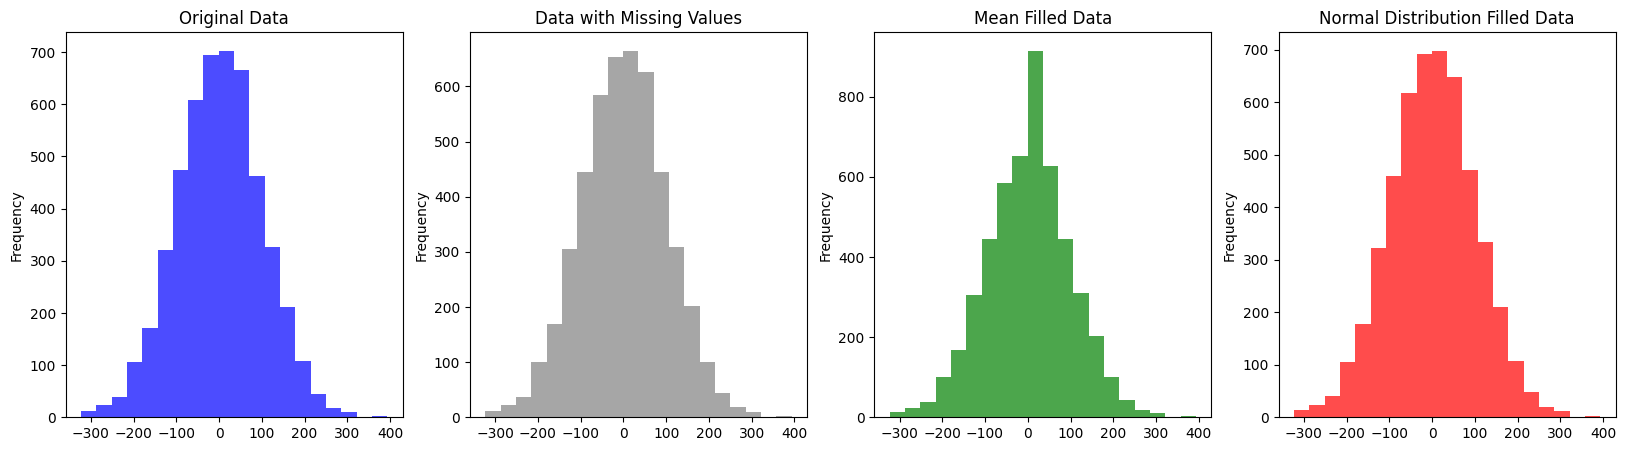

In [14]:
# Plotting histograms
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
df['Numeric'].plot(kind='hist', ax=axes[0], bins=20, alpha=0.7, color='blue', title='Original Data')
df_with_missing['Numeric'].plot(kind='hist', ax=axes[1], bins=20, alpha=0.7, color='gray', title='Data with Missing Values')
df_mean_filled['Numeric'].plot(kind='hist', ax=axes[2], bins=20, alpha=0.7, color='green', title='Mean Filled Data')
df_normal_filled['Numeric'].plot(kind='hist', ax=axes[3], bins=20, alpha=0.7, color='red', title='Normal Distribution Filled Data')
